In [ ]:
ls drive/MyDrive/Datasets/

test_set/  training_set/


In [ ]:
/content/drive/MyDrive/Datasets

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 38kB/s 


In [ ]:
!nvidia-smi

Mon Jul  5 10:29:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
image_size = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/training_set'
test_path = '/content/drive/MyDrive/Datasets/test_set'

In [ ]:
inception = InceptionV3(input_shape=image_size+[3], include_top=False, weights='imagenet',)

87916544/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
#Useful for getting output classes

folders = glob('/content/drive/MyDrive/Datasets/training_set/*')

In [ ]:
folders

['/content/drive/MyDrive/Datasets/training_set/dogs',
 '/content/drive/MyDrive/Datasets/training_set/cats']

In [ ]:
#Our layers - you can add more
x = Flatten()(inception.output)

In [ ]:
predictions = Dense(len(folders), activation = 'sigmoid')(x)

In [ ]:
model = Model(inputs = inception.input, outputs = predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(shear_range = 0.2, rescale = 1./255, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
test_data = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_data.flow_from_directory(train_path, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 8015 images belonging to 2 classes.


In [ ]:
testing_set = test_data.flow_from_directory(test_path, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
model.fit(training_set, validation_data = testing_set, epochs = 10, steps_per_epoch = len(training_set), validation_steps = len(testing_set))

Epoch 1/10
251/251 [==============================] - 2142s 9s/step - loss: 0.2328 - accuracy: 0.9745 - val_loss: 0.2152 - val_accuracy: 0.9785
Epoch 2/10
251/251 [==============================] - 878s 4s/step - loss: 0.2218 - accuracy: 0.9838 - val_loss: 0.1723 - val_accuracy: 0.9890
Epoch 3/10
251/251 [==============================] - 916s 4s/step - loss: 0.1574 - accuracy: 0.9879 - val_loss: 0.1612 - val_accuracy: 0.9880
Epoch 4/10
251/251 [==============================] - 895s 4s/step - loss: 0.1764 - accuracy: 0.9883 - val_loss: 0.2282 - val_accuracy: 0.9870
Epoch 5/10
251/251 [==============================] - 886s 4s/step - loss: 0.1006 - accuracy: 0.9931 - val_loss: 0.1905 - val_accuracy: 0.9910
Epoch 6/10
251/251 [==============================] - 907s 4s/step - loss: 0.1466 - accuracy: 0.9911 - val_loss: 0.2241 - val_accuracy: 0.9875
Epoch 7/10
251/251 [==============================] - 885s 4s/step - loss: 0.1217 - accuracy: 0.9941 - val_loss: 0.2498 - val_accuracy: 0.989

In [ ]:
import pandas as pd

In [ ]:
loss = pd.DataFrame(model.history.history)

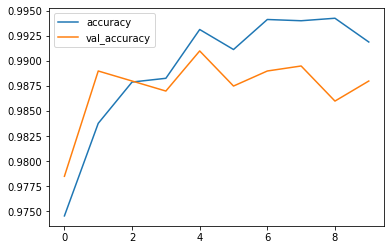

In [ ]:
loss[['accuracy', 'val_accuracy']].plot()

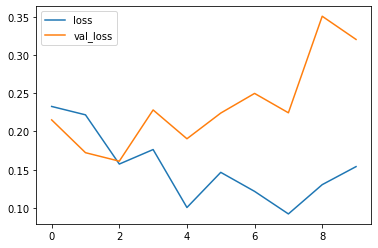

In [ ]:
loss[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(testing_set)

63/63 [==============================] - 166s 3s/step - loss: 0.3204 - accuracy: 0.9880


[0.3204415440559387, 0.9879999756813049]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
pred = model.predict_classes(testing_set)

AttributeError: ignored

In [ ]:
pred[:10]

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.5440221e-38, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [8.3351653e-30, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
pred_class = pred[:,0]>0.5

In [ ]:
print(classification_report(testing_set.classes, pred_class))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49      1000
           1       0.50      0.51      0.50      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [ ]:
train_pred = model.predict(training_set)

In [ ]:
train_pred_cat = train_pred[:,0]>0.5

In [ ]:
print(classification_report(training_set.classes, train_pred_cat))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49      4015
           1       0.49      0.50      0.50      4000

    accuracy                           0.50      8015
   macro avg       0.50      0.50      0.50      8015
weighted avg       0.50      0.50      0.50      8015

